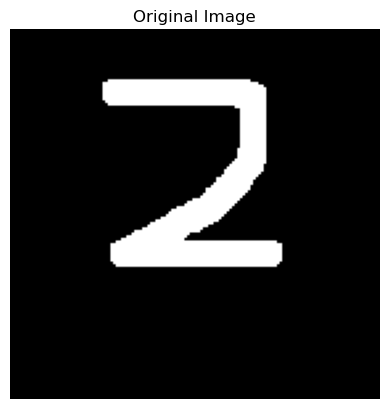

(None, (140, 140))

In [6]:
import cv2
import matplotlib.pyplot as plt

# 加載用戶上傳的圖像
image_path = 'database02/02.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# 查看圖像屬性並顯示原始圖像
image_shape = image.shape

# 顯示原始圖像
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")
plt.show(), image_shape


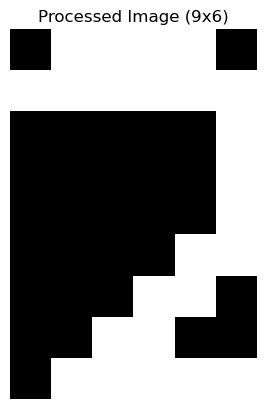

array([  0, 255, 255, 255, 255,   0, 255, 255, 255, 255, 255, 255,   0,
         0,   0,   0,   0, 255,   0,   0,   0,   0,   0, 255,   0,   0,
         0,   0,   0, 255,   0,   0,   0,   0, 255, 255,   0,   0,   0,
       255, 255,   0,   0,   0, 255, 255,   0,   0,   0, 255, 255, 255,
       255, 255], dtype=uint8)

In [7]:
# 找到圖像中的前景（白色部分）的邊界
x, y, w, h = cv2.boundingRect(image)

# 裁剪出圖像中的數字部分
cropped_image = image[y:y+h, x:x+w]

# 將裁剪的圖像調整為 9x6 大小
resized_image = cv2.resize(cropped_image, (6, 9), interpolation=cv2.INTER_NEAREST)

# 顯示處理後的圖像
plt.imshow(resized_image, cmap='gray')
plt.title("Processed Image (9x6)")
plt.axis("off")
plt.show()

# 展平成向量
flattened_image = resized_image.flatten()
flattened_image


In [8]:
import cv2
import numpy as np
import os

# 定義文件夾路徑
folder_path = "database02"

# 定義處理圖像的函數
def process_image(image_path):
    # 讀取圖像
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # 將圖像二值化為黑白
    _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

    # 找到圖像中的前景（白色部分）的邊界
    x, y, w, h = cv2.boundingRect(binary_image)

    # 裁剪出圖像中的數字部分
    cropped_image = binary_image[y:y+h, x:x+w]

    # 將裁剪的圖像調整為 9x6 大小
    resized_image = cv2.resize(cropped_image, (6, 9), interpolation=cv2.INTER_NEAREST)

    # 展平成向量
    flattened_image = resized_image.flatten()

    return flattened_image

# 處理文件夾中的每張圖像
processed_images = []
for i in range(0, 10):  # 假設文件名為 01.png 到 09.png
    image_path = os.path.join(folder_path, f"{i:02}.png")
    if os.path.exists(image_path):
        flattened_image = process_image(image_path)
        processed_images.append(flattened_image)
        print(f"Processed {image_path}: {flattened_image}")
    else:
        print(f"File {image_path} does not exist.")

# processed_images 包含所有處理後的圖像向量


Processed database02\00.png: [  0   0   0 255   0   0   0 255 255   0 255 255   0 255   0   0   0 255
 255   0   0   0   0   0 255   0   0   0   0   0 255   0   0   0   0   0
 255   0   0   0   0   0   0 255   0   0   0 255   0   0 255   0   0 255]
Processed database02\01.png: [  0   0 255 255 255   0 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
Processed database02\02.png: [  0 255 255 255 255   0 255 255 255 255 255 255   0   0   0   0   0 255
   0   0   0   0   0 255   0   0   0   0   0 255   0   0   0   0 255 255
   0   0   0 255 255   0   0   0 255 255   0   0   0 255 255 255 255 255]
Processed database02\03.png: [  0 255 255 255 255   0   0 255 255 255 255   0   0   0   0   0   0 255
   0   0   0 255 255 255   0 255 255 255 255 255   0   0   0   0   0 255
   0   0   0   0   0 255   0 255   0   0   0 255   0 255 255 255 255 255]
Proc

In [9]:
#training data
import cv2
import numpy as np
import os

# 定義文件夾路徑
input_folder_path = "database02"
output_folder_path = "database02/train"

# 創建輸出文件夾（如果不存在）
os.makedirs(output_folder_path, exist_ok=True)

# 定義處理圖像的函數
def process_image(image_path):
    # 讀取圖像
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # 將圖像二值化為黑白
    _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

    # 找到圖像中的前景（白色部分）的邊界
    x, y, w, h = cv2.boundingRect(binary_image)

    # 裁剪出圖像中的數字部分
    cropped_image = binary_image[y:y+h, x:x+w]

    # 將裁剪的圖像調整為 9x6 大小
    resized_image = cv2.resize(cropped_image, (6, 9), interpolation=cv2.INTER_NEAREST)

    # 展平成向量
    flattened_image = resized_image.flatten()

    return flattened_image

# 處理文件夾中的每張圖像並保存
for i in range(0, 10):  # 假設文件名為 01.png 到 09.png
    image_path = os.path.join(input_folder_path, f"{i:02}.png")
    output_path = os.path.join(output_folder_path, f"{i:02}.npy")
    
    if os.path.exists(image_path):
        flattened_image = process_image(image_path)
        # 將處理後的向量保存為 .npy 文件
        np.save(output_path, flattened_image)
        print(f"Processed and saved {image_path} to {output_path}")
    else:
        print(f"File {image_path} does not exist.")


Processed and saved database02\00.png to database02/train\00.npy
Processed and saved database02\01.png to database02/train\01.npy
Processed and saved database02\02.png to database02/train\02.npy
Processed and saved database02\03.png to database02/train\03.npy
Processed and saved database02\04.png to database02/train\04.npy
Processed and saved database02\05.png to database02/train\05.npy
Processed and saved database02\06.png to database02/train\06.npy
Processed and saved database02\07.png to database02/train\07.npy
Processed and saved database02\08.png to database02/train\08.npy
Processed and saved database02\09.png to database02/train\09.npy


In [ ]:
# test
import cv2
import numpy as np
import os
# 定義文件夾路徑
input_folder_path = "database02"
output_folder_path = "database02/test"
# 創建輸出文件夾（如果不存在）
os.makedirs(output_folder_path, exist_ok=True)
# 定義處理圖像的函數
def process_image(image_path):
    # 讀取圖像
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # 將圖像二值化為黑白
    _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

    # 找到圖像中的前景（白色部分）的邊界
    x, y, w, h = cv2.boundingRect(binary_image)

    # 裁剪出圖像中的數字部分
    cropped_image = binary_image[y:y+h, x:x+w]

    # 將裁剪的圖像調整為 9x6 大小
    resized_image = cv2.resize(cropped_image, (6, 9), interpolation=cv2.INTER_NEAREST)

    # 展平成向量
    flattened_image = resized_image.flatten()

    return flattened_image
# 處理文件夾中的每張圖像並保存
for i in range(0, 10):  # 假設文件名為 01.png 到 09.png
    image_path = os.path.join(input_folder_path, f"{i:02}_02.png")
    output_path = os.path.join(output_folder_path, f"{i:02}.npy")    
    if os.path.exists(image_path):
        flattened_image = process_image(image_path)
        # 將處理後的向量保存為 .npy 文件
        np.save(output_path, flattened_image)
        print(f"Processed and saved {image_path} to {output_path}")
    else:
        print(f"File {image_path} does not exist.")


Processed and saved database02\00_02.png to database02/test\00.npy
Processed and saved database02\01_02.png to database02/test\01.npy
Processed and saved database02\02_02.png to database02/test\02.npy
Processed and saved database02\03_02.png to database02/test\03.npy
Processed and saved database02\04_02.png to database02/test\04.npy
Processed and saved database02\05_02.png to database02/test\05.npy
Processed and saved database02\06_02.png to database02/test\06.npy
Processed and saved database02\07_02.png to database02/test\07.npy
Processed and saved database02\08_02.png to database02/test\08.npy
Processed and saved database02\09_02.png to database02/test\09.npy


In [32]:
import numpy as np
import os

# 指定文件路徑
file_path = "database02/train/01.npy"

# 檢查文件是否存在並加載
if os.path.exists(file_path):
    loaded_data = np.load(file_path)
    print("Loaded data from 01.npy:", loaded_data)
    print("Data shape:", loaded_data.shape)
else:
    print(f"File {file_path} does not exist.")


Loaded data from 01.npy: [  0   0 255 255 255   0 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
Data shape: (54,)


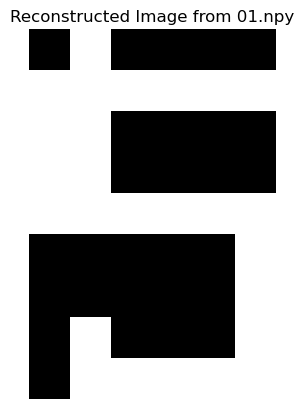

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import os

# 指定文件路徑
file_path = "database02/train/05.npy"

# 檢查文件是否存在並加載
if os.path.exists(file_path):
    # 加載展平的圖像數據
    loaded_data = np.load(file_path)
    
    # 重塑數據為 9x6 圖像格式
    reshaped_image = loaded_data.reshape((9, 6))
    
    # 顯示圖像
    plt.imshow(reshaped_image, cmap='gray')
    plt.title("Reconstructed Image from 01.npy")
    plt.axis("off")  # 隱藏坐標軸
    plt.show()
else:
    print(f"File {file_path} does not exist.")


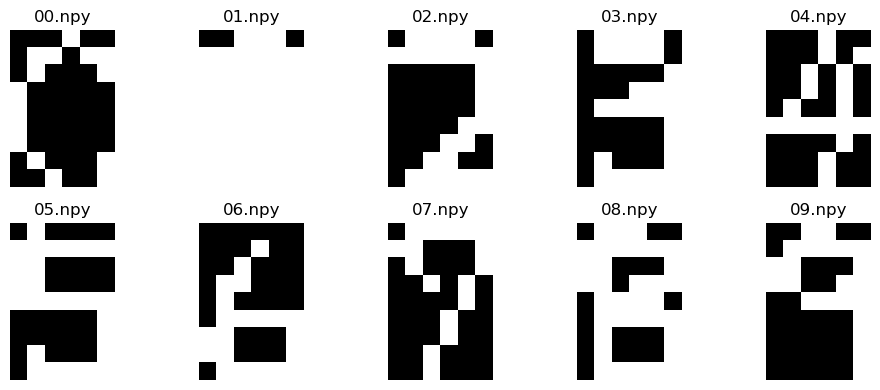

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os

# 定義文件夾路徑
folder_path = "database02/train"

# 創建一個子圖，兩行並排顯示 00.npy 到 09.npy 的圖像
fig, axes = plt.subplots(2, 5, figsize=(10, 4))  # 2 行 5 列

for i in range(10):
    file_path = os.path.join(folder_path, f"{i:02}.npy")
    ax = axes[i // 5, i % 5]  # 確定子圖的位置
    
    if os.path.exists(file_path):
        # 加載展平的圖像數據
        loaded_data = np.load(file_path)
        
        # 重塑數據為 9x6 圖像格式
        reshaped_image = loaded_data.reshape((9, 6))
        
        # 顯示圖像
        ax.imshow(reshaped_image, cmap='gray')
        ax.set_title(f"{i:02}.npy")
        ax.axis("off")  # 隱藏坐標軸
    else:
        print(f"File {file_path} does not exist.")

# 調整布局並顯示所有圖像
plt.tight_layout()
plt.show()


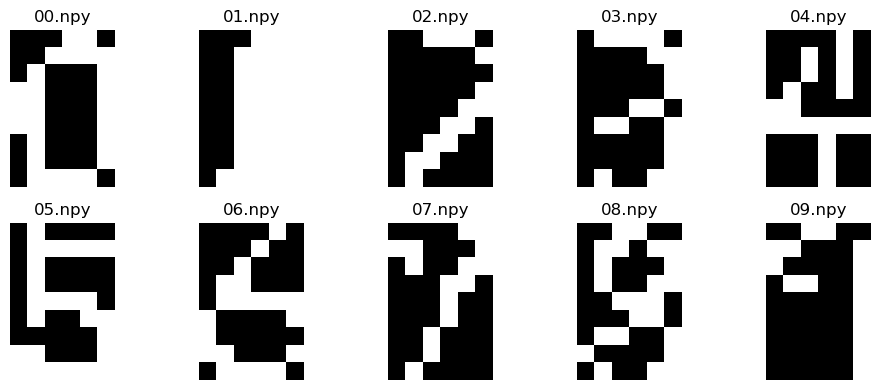

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import os

# 定義文件夾路徑
folder_path = "database02/test"

# 創建一個子圖，兩行並排顯示 00.npy 到 09.npy 的圖像
fig, axes = plt.subplots(2, 5, figsize=(10, 4))  # 2 行 5 列

for i in range(10):
    file_path = os.path.join(folder_path, f"{i:02}.npy")
    ax = axes[i // 5, i % 5]  # 確定子圖的位置
    
    if os.path.exists(file_path):
        # 加載展平的圖像數據
        loaded_data = np.load(file_path)
        
        # 重塑數據為 9x6 圖像格式
        reshaped_image = loaded_data.reshape((9, 6))
        
        # 顯示圖像
        ax.imshow(reshaped_image, cmap='gray')
        ax.set_title(f"{i:02}.npy")
        ax.axis("off")  # 隱藏坐標軸
    else:
        print(f"File {file_path} does not exist.")

# 調整布局並顯示所有圖像
plt.tight_layout()
plt.show()
